# 회귀

최적의 회귀 모델: 잔차(오류 값) 합이 최소가 되는 모델을 만든다는 의미  
rss(residual sum of square): 오류 값의 제곱을 구해서 더하는 방식  

## 경사 하강법
점진적으로 반복적인 계산을 통해 w파라미터 값을 업데이트하며 오류 값이 최소가 되는 w파라미터를 구하는 방식  
반복적으로 비용함수의 반환 값, 즉 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 w 파라미터를 지속해서 보정<br>
오류 값이 더 이상 작아지지 않으면 그 오류값을 최소 비용으로 판단하고 그때의 w값을 최적 파라미터로 반환

w0, w1 2개의 파라미터를 가지는 R(W) 함수의 경우 w0, w1 각 변수에 편미분을 적용해 이 결괏값을 반복적으로 보정하면서 R(W)가 최소가 되는 w1, w0값을 구하기  
업데이트는 새로운 w1을 이전 w1에서 편미분 결괏값을 마이너스하면서 적용  
위 편미분 값이 너무 클 수 있으므로 보정 계수(학습률)을 곱합

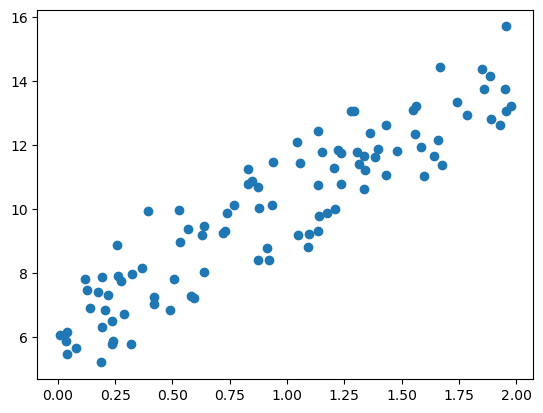

In [1]:
# 경사 하강법 구현
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)
# y = 4X + 6을 근사(w1 = 4, w0 = 6), 임의의 값은 노이즈를 위해 만듦
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X+np.random.randn(100, 1)
# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)

In [2]:
# 비용함수 정의
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

### 경사 하강법 구현
gradient_descent()는 w1과 w0을 모두 0으로 초기화한 뒤 iters 개수만큼 반복하면서 w1과 w0을 업데이트  
gradient_descent()는 위에서 무작위로 입력한 X와 y값을 받는데, X, y모두 넘파이 ndarray  
get_weight_update() 함수에서 입력배열 X값에 대한 예측 배열 y_pred는 np.dot(X, w1.T) + w0으로 계산  
100개의 데이터 X(1,2,...100)이 있다면 예측값은 W0 + X(1) * w1 + ... + X(100) * w1로 이는 입력배열 X와 w1배열의 내적과 동일  
또한 w1_update, w0_update로 각 값을 넘파이의 dot 행렬 연산으로 계산한 뒤 이를 반환

In [9]:
#w1과 w0을 업데이트할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate = 0.01):
    N = len(y)
    #먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    #예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred

    #w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))

    #w1과 w0을 업데이트 할 w1_update와 w0_update계산
    w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
    w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [10]:
#get_weight_updates()를 경사 하강 방식으로 반복적으로 수행하여 w1과 w0을 업데이트 하는 함수인 gradient_descent_steps()함수 생성
def gradient_descent_steps(X, y, iters = 10000):
    # w0과 w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    #인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 w1, w0업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate = 0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1, w0

In [11]:
#gradient_descent_steps()를 호출해 w1과 w0을 구해보기
#최종적으로 예측값과 실제값의 RSS차이를 계산하는 get_cost()함수를 생성하고 이를 이용해 경사하강법의 예측 오류 계산
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters = 1000)
print("w1:{0:.3f} w0:{1:3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162031
Gradient Descent Total Cost: 0.9935


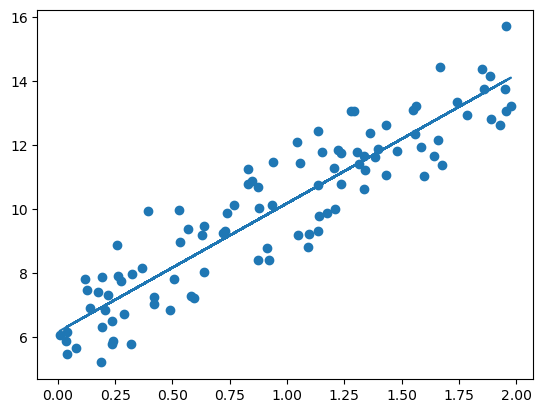

In [12]:
# 실제 선형식인 y = 4X + 6과 유사한 결과
# 예측 오류 비용은 약 0.9935
plt.scatter(X, y)
plt.plot(X, y_pred)

## 확률적 경사 하강법
일반적인 경사 하강법은 시간이 매우 오래 걸림  
실전에서는 확률적 경사 하강법 이용  
일부 데이터만 이용해 w가 업데이트 되는 값을 계산하므로 빠른 속도 보장  

In [15]:
# (미니배치) 확률적 경사 하강법 구현
def stochastic_gradient_descent_steps(X, y, batch_size = 10, iters = 1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    for ind in range(iters):
        np.random.seed(ind)
        #전체 X, y데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        #랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate = 0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1, w0
        

In [16]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters = 1000)
print('w1: ', round(w1[0,0], 3), 'w0: ', round(w0[0,0], 3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:  4.028 w0:  6.156
Stochastic Gradient Descent Total Cost:0.9937


## 피처가 여러개인 경우의 회귀 계수 도출
피처가 M개 있으면 그에 따른 회귀 계수도 M+1개 도출  
데이터의 개수가 N이고 피처 M개의 입력 행렬을 X mat, 회귀계수 w1, w2, ... w100을 w배열로 표기하면 예측 행렬 y^ = np.dot(X mat, W^T) + w0로 구할 수 있음